In [ ]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:

df= pd.read_csv('kc_house_data.csv')

In [ ]:
# Display the first five observations
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Describe the dataset
df.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


In [ ]:
# Drop the id and date columns
df = df.drop(['id', 'date'], axis=1)

In [ ]:
# Display the number of data observations
len(df)

21613

In [ ]:
len(df.columns)

19

In [ ]:
# Check the types of data
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
# Display the number of null data observations
df.isnull().values.sum()

0

In [ ]:
# Specify target and features
target = df.iloc[:, 0].name
features = df.iloc[:, 1:].columns.tolist()
features


['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [ ]:
target

'price'

In [ ]:
# Correlations of features with target variable
correlations = df.corr()
correlations['price']

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [ ]:
# Correlations with target variable
cor_target = abs(correlations['price'])

# Display features with correlation < 0.2
removed_features = cor_target[cor_target < 0.2]
removed_features

sqft_lot        0.089661
condition       0.036362
yr_built        0.054012
yr_renovated    0.126434
zipcode         0.053203
long            0.021626
sqft_lot15      0.082447
Name: price, dtype: float64

In [ ]:
# Remove features with correlation < 0.2
df = df.drop(['sqft_lot', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'long',
              'sqft_lot15'], axis=1)

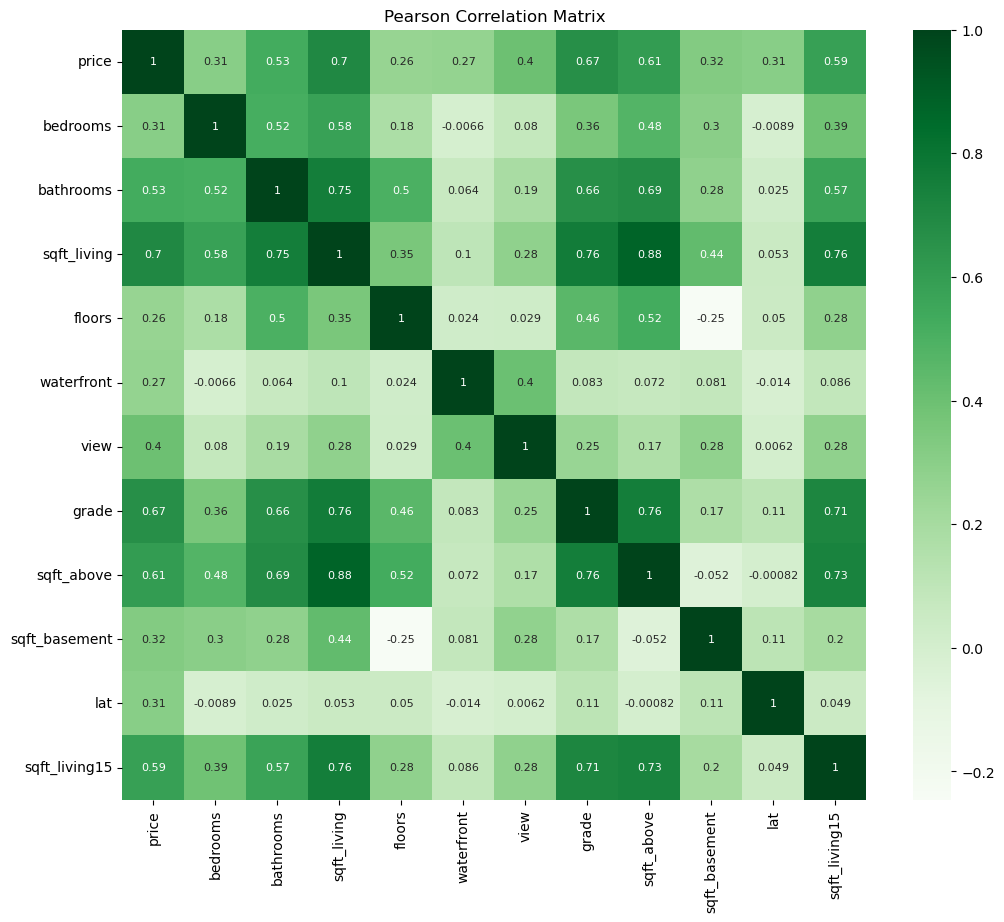

In [ ]:
# Plot Pearson correlation matrix
fig_1 = plt.figure(figsize=(12, 10))
new_correlations = df.corr()
sns.heatmap(new_correlations, annot=True, cmap='Greens', annot_kws={'size': 8})
plt.title('Pearson Correlation Matrix')
plt.show()

In [ ]:
# Determine the highest intercorrelations
highly_correlated_features = new_correlations[new_correlations > 0.75]
highly_correlated_features.fillna('-')

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
price,1.0,-,-,-,-,-,-,-,-,-,-,-
bedrooms,-,1.0,-,-,-,-,-,-,-,-,-,-
bathrooms,-,-,1.0,0.754665,-,-,-,-,-,-,-,-
sqft_living,-,-,0.754665,1.0,-,-,-,0.762704,0.876597,-,-,0.75642
floors,-,-,-,-,1.0,-,-,-,-,-,-,-
waterfront,-,-,-,-,-,1.0,-,-,-,-,-,-
view,-,-,-,-,-,-,1.0,-,-,-,-,-
grade,-,-,-,0.762704,-,-,-,1.0,0.755923,-,-,-
sqft_above,-,-,-,0.876597,-,-,-,0.755923,1.0,-,-,-
sqft_basement,-,-,-,-,-,-,-,-,-,1.0,-,-


In [ ]:
# Remove features which are highly correlated with "sqft_living"
df = df.drop(['sqft_above', 'sqft_living15'], axis=1)

In [ ]:
# Update features and store their length
features = df.iloc[:, 1:].columns.tolist()
len_of_features = len(features)
len_of_features

# Display the first five observations
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,lat
0,221900.0,3,1.00,1180,1.0,0,0,7,0,47.5112
1,538000.0,3,2.25,2570,2.0,0,0,7,400,47.7210
2,180000.0,2,1.00,770,1.0,0,0,6,0,47.7379
3,604000.0,4,3.00,1960,1.0,0,0,7,910,47.5208
4,510000.0,3,2.00,1680,1.0,0,0,8,0,47.6168


In [ ]:
# Normalize the features
df.iloc[:, 1:] = (df - df.mean())/df.std()

In [ ]:
# Create X, y and theta
X = df.iloc[:, 1:]
# Création de la matrice X, inclut le Biais
X = np.hstack((X, np.ones((X.shape[0], 1)))) # ajoute un vecteur Biais de dimension (x.shape[0], 1)
print(X.shape)
print(X[:10])

(21613, 10)
[[-0.86669728 -0.39872792 -1.44743008 -0.97981235 -0.91540583 -0.08717061
  -0.30575239 -0.55882282 -0.6586658   1.        ]
 [-0.00568779 -0.39872792  0.17560263  0.53362199  0.93648411 -0.08717061
  -0.30575239 -0.55882282  0.24513573  1.        ]
 [-0.98082666 -1.47392526 -1.44743008 -1.42622105 -0.91540583 -0.08717061
  -0.30575239 -1.4095545  -0.6586658   1.        ]
 [ 0.17408642  0.67646941  1.14942226 -0.13054704 -0.91540583 -0.08717061
  -0.30575239 -0.55882282  1.39748267  1.        ]
 [-0.08195563 -0.39872792 -0.14900391 -0.43541151 -0.91540583 -0.08717061
  -0.30575239  0.29190886 -0.6586658   1.        ]
 [ 1.86559826  0.67646941  3.09706152  3.63670681 -0.91540583 -0.08717061
  -0.30575239  2.84410389  2.79837504  1.        ]
 [-0.76972816 -0.39872792  0.17560263 -0.39730345  0.93648411 -0.08717061
  -0.30575239 -0.55882282 -0.6586658   1.        ]
 [-0.67616386 -0.39872792 -0.798217   -1.11046856 -0.91540583 -0.08717061
  -0.30575239 -0.55882282 -0.6586658   

In [ ]:
y = df.iloc[:, 0:1].values
# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
theta = np.random.randn(10, 1)
theta

array([[-0.18997001],
       [ 0.78029242],
       [ 0.45921353],
       [ 0.13152102],
       [ 1.63062358],
       [-0.28365887],
       [ 0.23713416],
       [ 1.8324375 ],
       [-0.67837055],
       [ 0.61480719]])

In [ ]:
print(X.shape)
print(y.shape)
print(theta.shape)

(21613, 10)
(21613, 1)
(10, 1)


In [ ]:
def model(X, theta): # définir le modèle
    return X.dot(theta)

In [ ]:
def cost_function(X, y, theta): #définir la fonction coût
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [ ]:
cost_function(X, y, theta)

213234669580.49963

In [ ]:
# définir la fonction de gradient
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [ ]:
# Définir la descente de gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]

    return theta, cost_history

In [ ]:
# Entrainement du modèle
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [ ]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

theta_final

array([[353752.18519928],
       [ -3146.5593765 ],
       [ -5696.11767545],
       [ 13735.81585643],
       [ -1322.32133977],
       [  2355.35895842],
       [   920.55714435],
       [  5658.88968176],
       [  -741.97174623],
       [540064.82551428]])

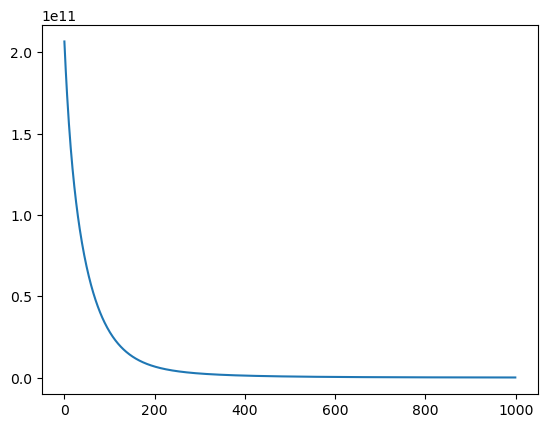

In [ ]:
# Courbe d'apprentissage
plt.plot(range(n_iterations), cost_history)
plt.show()

In [ ]:
# Evaluation du modèle
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [ ]:
coef_determination(y, predictions)

0.9992729289124922

In [ ]:

str(predictions[4].round(2))

'[510059.75]'

In [ ]:
str(y[4].round(2))

'[510000.]'

In [ ]:
str(predictions[4].round(2)-y[4].round(2))

'[59.75]'